In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy.stats import binom
from scipy.stats import weibull_min


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

In [263]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 250)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)'],axis =1)

#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



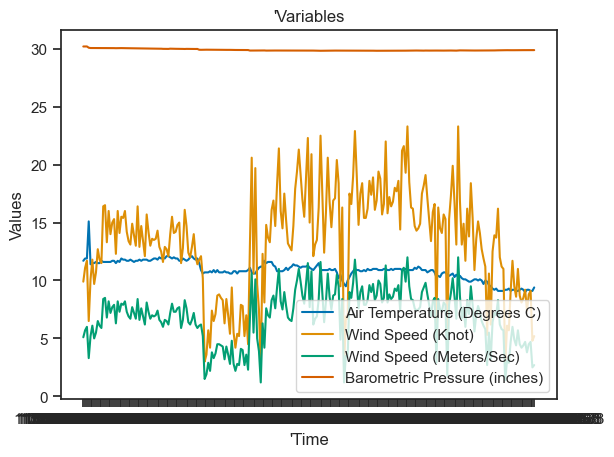

In [264]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Meters/Sec)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [265]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']

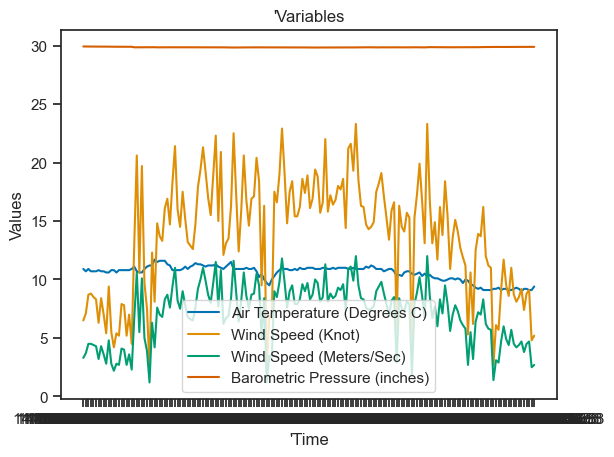

In [266]:
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Meters/Sec)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
#plt.show()
plt.show()

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [267]:
df2['SensorTimestamp']


72     14/08/2015 00:02:20
73     14/08/2015 00:07:21
74     14/08/2015 00:12:22
75     14/08/2015 00:17:22
76     14/08/2015 00:22:22
              ...         
245    14/08/2015 22:14:57
246    14/08/2015 22:19:58
247    14/08/2015 22:24:58
248    14/08/2015 22:29:58
249    14/08/2015 22:34:58
Name: SensorTimestamp, Length: 178, dtype: object

In [268]:
pd.to_datetime(df2['SensorTimestamp'])

72    2015-08-14 00:02:20
73    2015-08-14 00:07:21
74    2015-08-14 00:12:22
75    2015-08-14 00:17:22
76    2015-08-14 00:22:22
              ...        
245   2015-08-14 22:14:57
246   2015-08-14 22:19:58
247   2015-08-14 22:24:58
248   2015-08-14 22:29:58
249   2015-08-14 22:34:58
Name: SensorTimestamp, Length: 178, dtype: datetime64[ns]

new variable datetime added

In [269]:
df2['datetime'] = pd.to_datetime(df2['SensorTimestamp'])


C:\Users\irivyo\AppData\Local\Temp\ipykernel_29380\3869816751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = pd.to_datetime(df2['SensorTimestamp'])


In [270]:
df2['datetime']


72    2015-08-14 00:02:20
73    2015-08-14 00:07:21
74    2015-08-14 00:12:22
75    2015-08-14 00:17:22
76    2015-08-14 00:22:22
              ...        
245   2015-08-14 22:14:57
246   2015-08-14 22:19:58
247   2015-08-14 22:24:58
248   2015-08-14 22:29:58
249   2015-08-14 22:34:58
Name: datetime, Length: 178, dtype: datetime64[ns]

In [271]:
df3=df2.loc[df2.loc[:,'datetime'] <= '25/08/2015']
df3

c:\Users\irivyo\Anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '25/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,3.3,1013.2,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,3.7,1013.0,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,4.5,1013.0,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,4.5,1012.9,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,4.4,1012.8,2015-08-14 00:22:22
...,...,...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,3.8,1011.9,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,4.5,1011.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,4.7,1011.8,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2.5,1011.8,2015-08-14 22:29:58


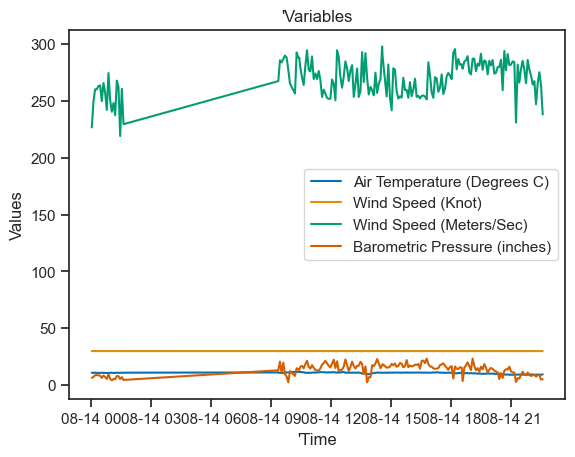

In [272]:
sns.lineplot(data=df3, x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3, x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3, x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3, x = "datetime", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [273]:
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,3.3,1013.2,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,3.7,1013.0,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,4.5,1013.0,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,4.5,1012.9,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,4.4,1012.8,2015-08-14 00:22:22
...,...,...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,3.8,1011.9,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,4.5,1011.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,4.7,1011.8,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2.5,1011.8,2015-08-14 22:29:58


In [274]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars)
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,10.550000,29.854820,269.320225,13.747753,7.074157,1011.000000
std,0.674746,0.020915,15.175070,4.958861,2.551837,0.708224
min,9.000000,29.828200,219.100000,2.300000,1.200000,1010.100000
25%,10.200000,29.843000,258.100000,9.500000,4.900000,1010.600000
50%,10.800000,29.848900,270.250000,14.750000,7.600000,1010.800000
75%,11.000000,29.857800,281.475000,17.175000,8.800000,1011.100000
max,11.700000,29.919800,297.900000,23.300000,12.000000,1013.200000


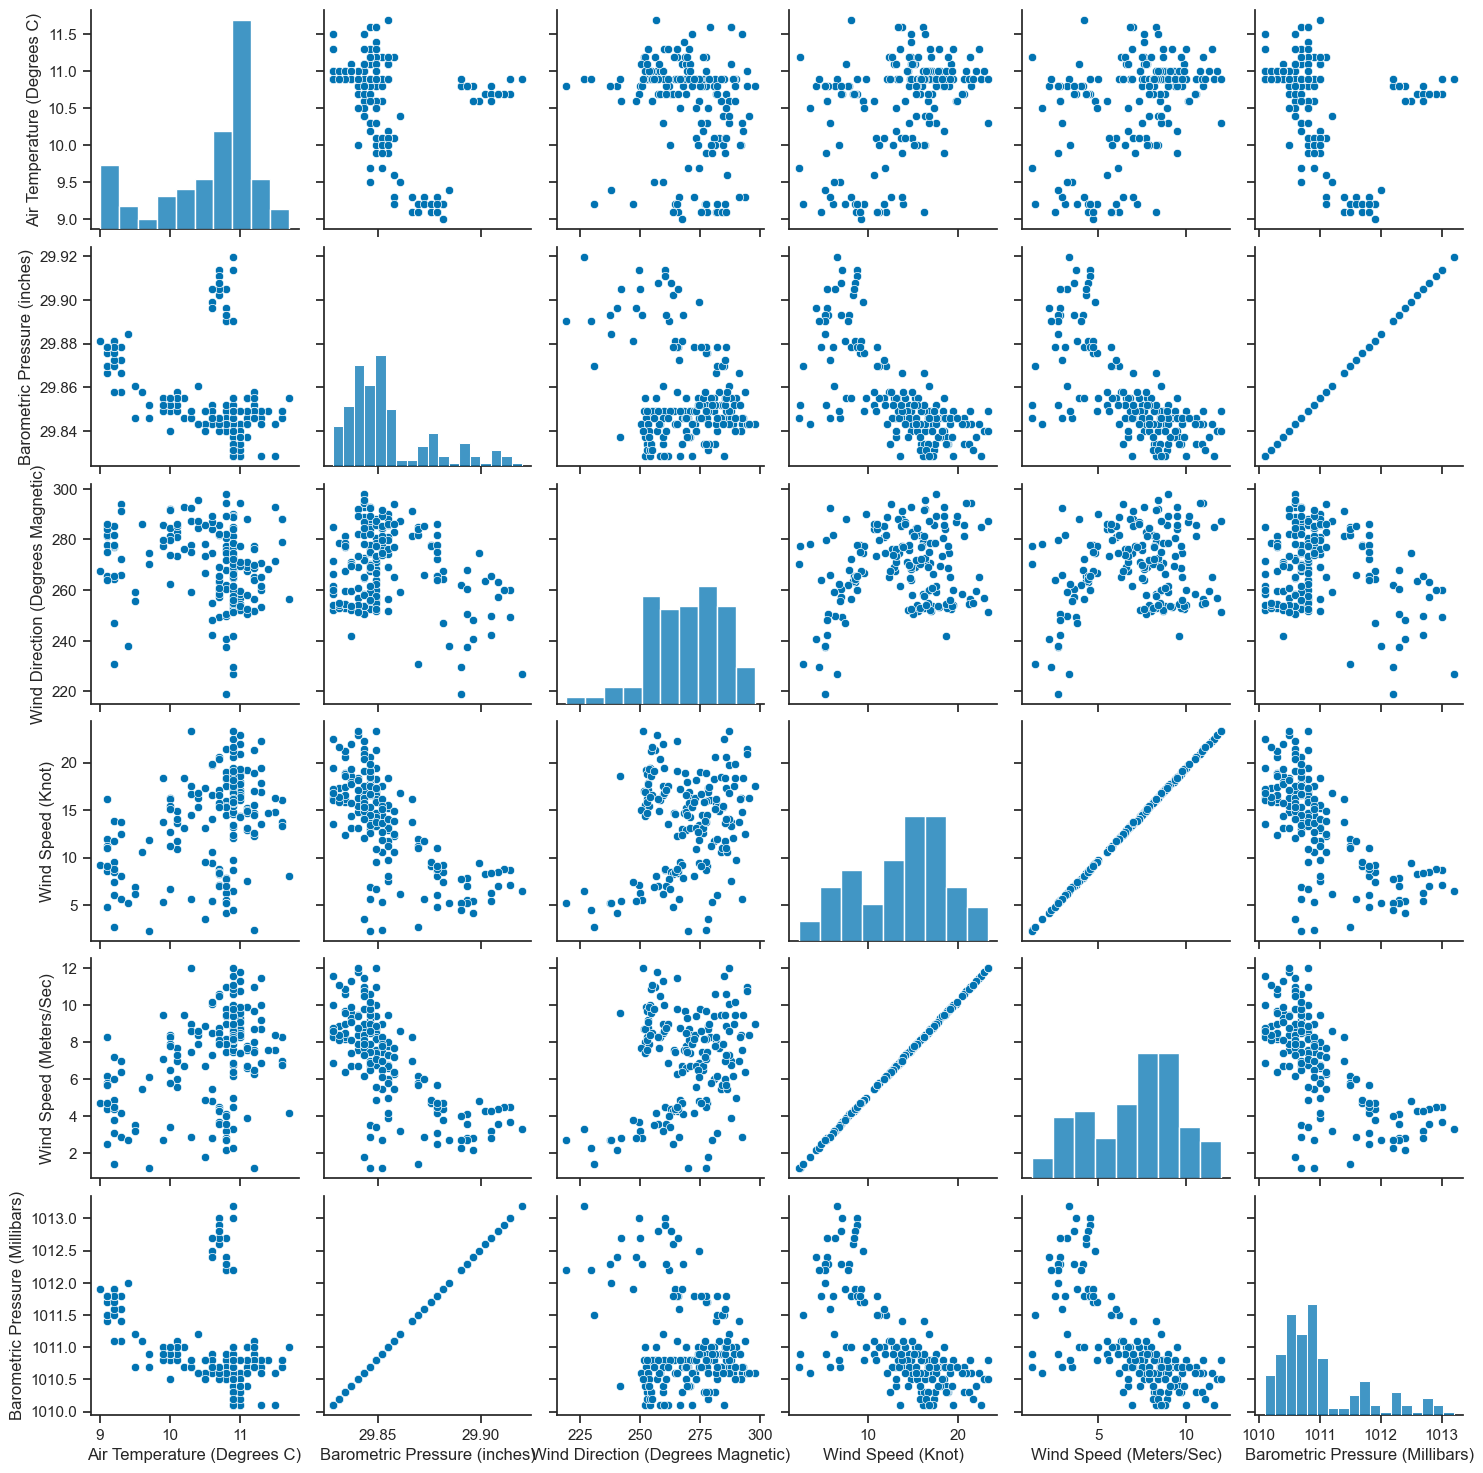

In [275]:
sns.pairplot(df3)
plt.show()

In [276]:
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,3.3,1013.2,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,3.7,1013.0,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,4.5,1013.0,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,4.5,1012.9,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,4.4,1012.8,2015-08-14 00:22:22
...,...,...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,3.8,1011.9,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,4.5,1011.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,4.7,1011.8,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2.5,1011.8,2015-08-14 22:29:58


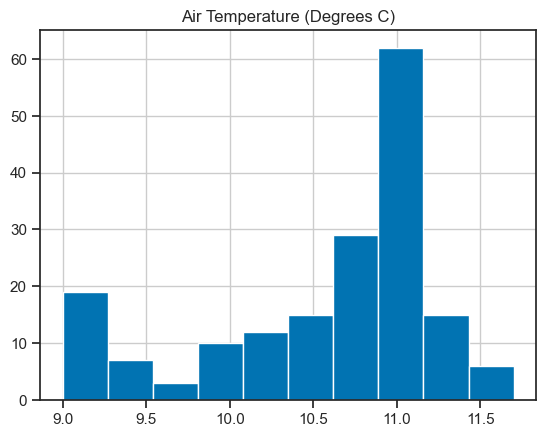

In [277]:
df3.hist('Air Temperature (Degrees C)')
plt.show()

In [429]:
idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=178, freq="MIN")
idx1

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               ...
               '2015-11-08 17:42:33', '2015-11-08 17:43:33',
               '2015-11-08 17:44:33', '2015-11-08 17:45:33',
               '2015-11-08 17:46:33', '2015-11-08 17:47:33',
               '2015-11-08 17:48:33', '2015-11-08 17:49:33',
               '2015-11-08 17:50:33', '2015-11-08 17:51:33'],
              dtype='datetime64[ns]', length=178, freq='T')

In [430]:
rng1 = np.random.default_rng()
ts1 = pd.DataFrame(data=rng1.poisson(11,len(idx1)),index =idx1, columns=['Synthesisd Air Temperature (Degrees C)'])
ts1

,Synthesisd Air Temperature (Degrees C)
2015-11-08 14:54:33,11
2015-11-08 14:55:33,10
2015-11-08 14:56:33,4
2015-11-08 14:57:33,9
2015-11-08 14:58:33,12
...,...
2015-11-08 17:47:33,9
2015-11-08 17:48:33,9
2015-11-08 17:49:33,4
2015-11-08 17:50:33,9


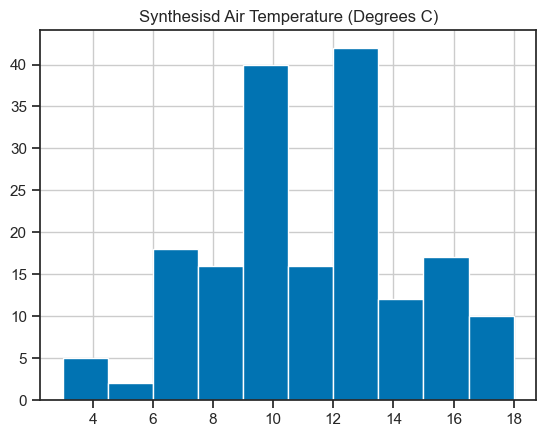

In [431]:

ts1.hist()
plt.show()

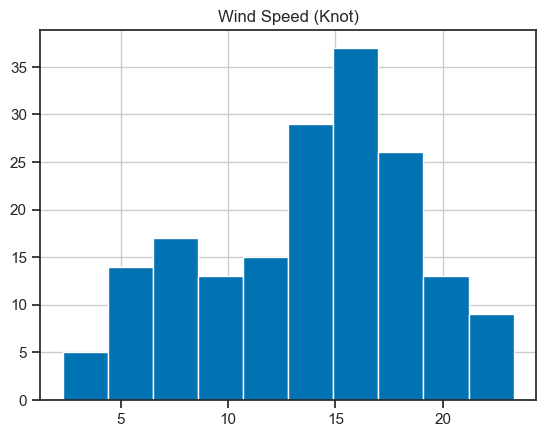

In [432]:
df3.hist('Wind Speed (Knot)')
plt.show()

In [433]:
idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
idx2

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               ...
               '2015-11-08 18:04:33', '2015-11-08 18:05:33',
               '2015-11-08 18:06:33', '2015-11-08 18:07:33',
               '2015-11-08 18:08:33', '2015-11-08 18:09:33',
               '2015-11-08 18:10:33', '2015-11-08 18:11:33',
               '2015-11-08 18:12:33', '2015-11-08 18:13:33'],
              dtype='datetime64[ns]', length=200, freq='T')

In [434]:
rng2 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
ts2 = pd.DataFrame(data=rng2.weibull(200,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
ts2

,Synthesised Wind Speed (Knot)
2015-11-08 14:54:33,0.994784
2015-11-08 14:55:33,0.994070
2015-11-08 14:56:33,1.004740
2015-11-08 14:57:33,0.994413
2015-11-08 14:58:33,1.005881
...,...
2015-11-08 17:47:33,1.002050
2015-11-08 17:48:33,0.984897
2015-11-08 17:49:33,0.982174
2015-11-08 17:50:33,0.997172


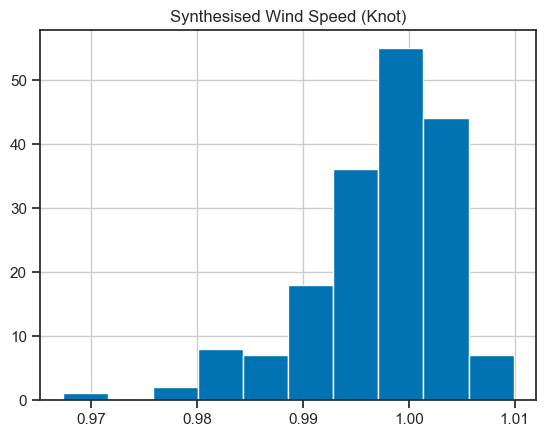

In [435]:
ts2.hist()
plt.show()

In [436]:
result=pd.concat([ts1,ts2])
result

,Synthesisd Air Temperature (Degrees C),Synthesised Wind Speed (Knot)
2015-11-08 14:54:33,11.0,NaN
2015-11-08 14:55:33,10.0,NaN
2015-11-08 14:56:33,4.0,NaN
2015-11-08 14:57:33,9.0,NaN
2015-11-08 14:58:33,12.0,NaN
...,...,...
2015-11-08 17:47:33,NaN,1.002050
2015-11-08 17:48:33,NaN,0.984897
2015-11-08 17:49:33,NaN,0.982174
2015-11-08 17:50:33,NaN,0.997172


<AxesSubplot:xlabel='Synthesisd Air Temperature (Degrees C)', ylabel='Density'>

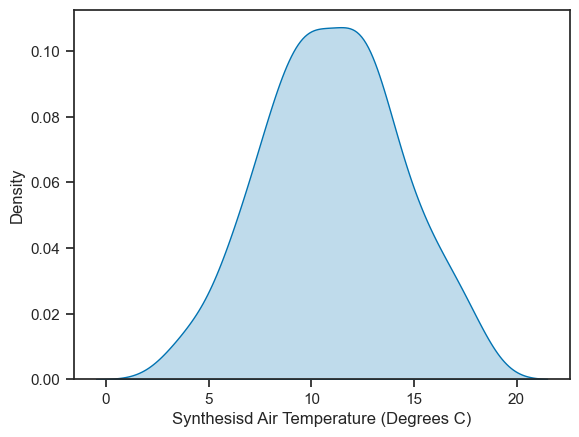

In [452]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

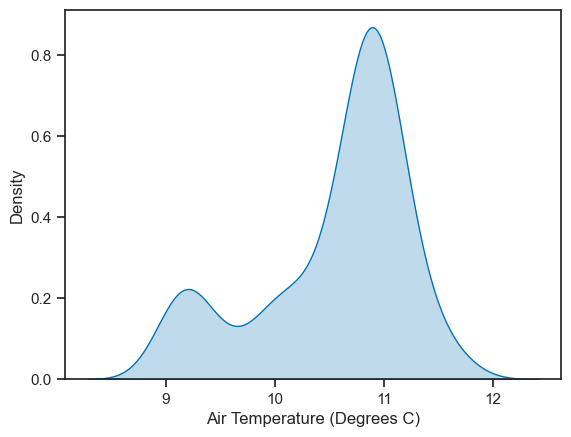

In [457]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

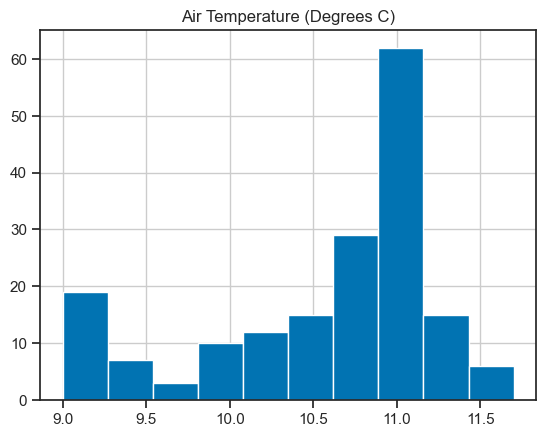

In [458]:
df3.hist('Air Temperature (Degrees C)')
plt.show()

In [459]:
idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
idx1

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               ...
               '2015-11-08 18:04:33', '2015-11-08 18:05:33',
               '2015-11-08 18:06:33', '2015-11-08 18:07:33',
               '2015-11-08 18:08:33', '2015-11-08 18:09:33',
               '2015-11-08 18:10:33', '2015-11-08 18:11:33',
               '2015-11-08 18:12:33', '2015-11-08 18:13:33'],
              dtype='datetime64[ns]', length=200, freq='T')

In [460]:
rng1 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
ts1

,Synthesisd Air Temperature (Degrees C)
2015-11-08 14:54:33,11
2015-11-08 14:55:33,10
2015-11-08 14:56:33,4
2015-11-08 14:57:33,9
2015-11-08 14:58:33,12
...,...
2015-11-08 17:47:33,9
2015-11-08 17:48:33,9
2015-11-08 17:49:33,4
2015-11-08 17:50:33,9


In [462]:
ts1.hist('Synthesises Weibull')
plt.show()

KeyError: "None of [Index(['Synthesises Weibull'], dtype='object')] are in the [columns]"

In [ ]:
df1.hist('Barometric Pressure (inches)')
plt.show()

In [ ]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [ ]:
np.random.seed(420)

# Generate random dataset from the Weibull distribution
size = 10000
k = 20
lambda_ = 30
data = np.random.weibull(k, size) * lambda_
data

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [ ]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

In [ ]:
rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

In [ ]:
ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded']), 
#ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded1'])
#ts1 = pd.DataFrame(data=rng.binomial(p = .75,len(idx)),index =idx, columns=['Incidents recorded1'])

In [ ]:
ts


In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

In [ ]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()